In [2]:
data = readRDS('~/data/rnaseq_derek/X_ACCnoPH_zv_nzv_center_scale.rds')
dim(data)

[1]    56 35826

In [8]:
install.packages('factoextra')

Installing package into ‘/spin1/home/linux/sudregp/R/3.6/library’
(as ‘lib’ is unspecified)



In [9]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [10]:
dep_vars = colnames(data)[grepl(colnames(data), pattern='^grex')]
res.pca <- prcomp(data[, dep_vars])

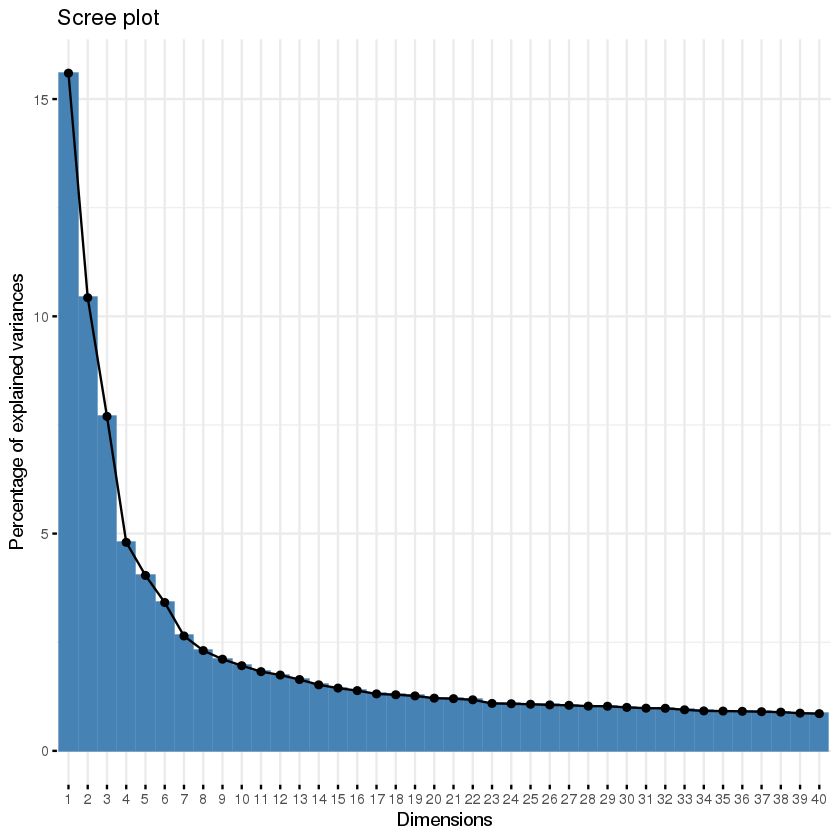

In [13]:
fviz_eig(res.pca, ncp=40)

In [14]:
install.packages('nFactors')

Installing package into ‘/spin1/home/linux/sudregp/R/3.6/library’
(as ‘lib’ is unspecified)



In [15]:
library(nFactors)
eigs <- res.pca$sdev^2
nS = nScree(x=eigs)
nS$Components$nkaiser

Loading required package: lattice


Attaching package: ‘nFactors’


The following object is masked from ‘package:lattice’:

    parallel




[1] 11

OK, so based on PCA we should only keep 11 components in ACC. How about Caudate?

[1] 12

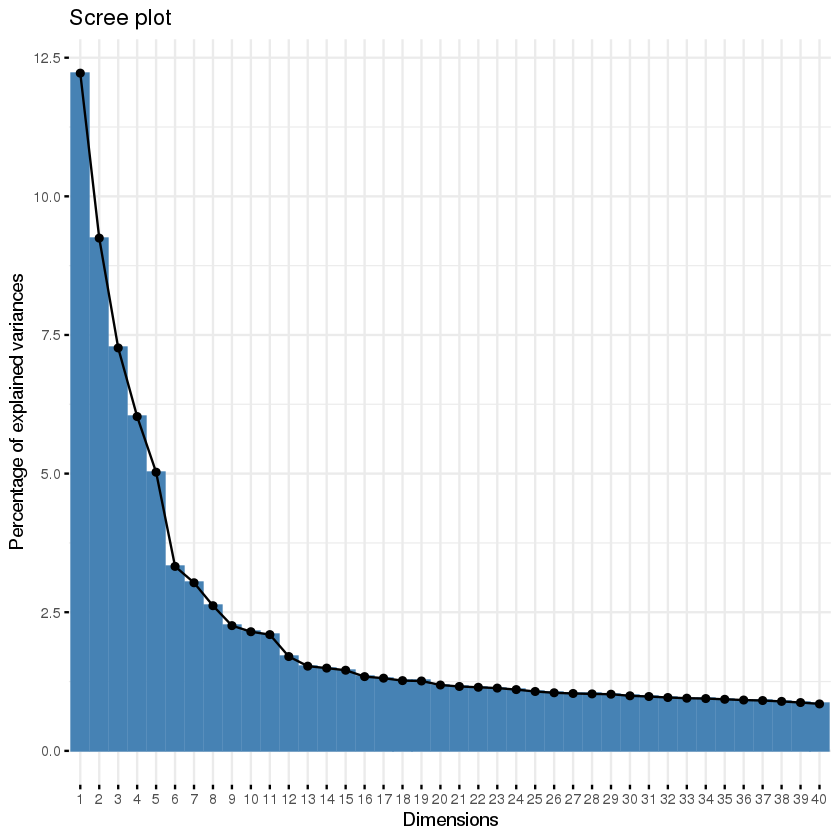

In [16]:
data = readRDS('~/data/rnaseq_derek/X_CaudatenoPH_zv_nzv_center_scale.rds')
dep_vars = colnames(data)[grepl(colnames(data), pattern='^grex')]
res.pca <- prcomp(data[, dep_vars])
fviz_eig(res.pca, ncp=40)
eigs <- res.pca$sdev^2
nS = nScree(x=eigs)
nS$Components$nkaiser

Sure, we can keep 12 just in case for both. I'll create a dataset with 12 in each, and then the ICA version of that. That should be a good start for reducing the space.

In [17]:
library(caret)

In [21]:
set.seed(42)
pp = preProcess(data[, dep_vars], method='pca', pcaComp = 12)
Xpca = predict(pp, data[, dep_vars])

In [25]:
new_data = cbind(Xpca, data[,!grepl(colnames(data), pattern='^grex')])
saveRDS(new_data, file='~/data/rnaseq_derek/X_CaudatenoPH_zv_nzv_center_scale_PCA.rds')

In [27]:
data = readRDS('~/data/rnaseq_derek/X_ACCnoPH_zv_nzv_center_scale.rds')
dep_vars = colnames(data)[grepl(colnames(data), pattern='^grex')]
set.seed(42)
pp = preProcess(data[, dep_vars], method='pca', pcaComp = 12)
Xpca = predict(pp, data[, dep_vars])
new_data = cbind(Xpca, data[,!grepl(colnames(data), pattern='^grex')])
saveRDS(new_data, file='~/data/rnaseq_derek/X_ACCnoPH_zv_nzv_center_scale_PCA.rds')

In [29]:
pp = preProcess(data[, dep_vars], method='ica', n.comp=12)
Xica = predict(pp, data[, dep_vars])


ERROR: Error in La.svd(V): cannot allocate memory block of size 134217728 Tb


That's a bummer... R couldn't run the ICA. Maybe I can do it in Matlab using ICASSO?

How about the findCorrelations function?

In [31]:
descrCor = cor(data[, dep_vars])
highlyCorDescr = findCorrelation(descrCor, cutoff = .75)

In [34]:
notCorData = data[, dep_vars][,-highlyCorDescr]

In [37]:
comboInfo <- findLinearCombos(notCorData)

In [38]:
noLinCombData = notCorData[, -comboInfo$remove]

In [39]:
dim(noLinCombData)

[1] 56 55

Yeah, I forgot that we'd need more observations than features for this one... oh well. We do remove 11K variable out of 35K by removing the very correlated ones... it'd be interesting to run that. So, let's save it and do it for Caudate as well:

In [40]:
new_data = cbind(notCorData, data[,!grepl(colnames(data), pattern='^grex')])
saveRDS(new_data, file='~/data/rnaseq_derek/X_ACCnoPH_zv_nzv_center_scale_noCorr75.rds')

In [41]:
data = readRDS('~/data/rnaseq_derek/X_CaudatenoPH_zv_nzv_center_scale.rds')
dep_vars = colnames(data)[grepl(colnames(data), pattern='^grex')]
set.seed(42)
descrCor = cor(data[, dep_vars])
highlyCorDescr = findCorrelation(descrCor, cutoff = .75)
notCorData = data[, dep_vars][,-highlyCorDescr]
new_data = cbind(notCorData, data[,!grepl(colnames(data), pattern='^grex')])
saveRDS(new_data, file='~/data/rnaseq_derek/X_CaudatenoPH_zv_nzv_center_scale_noCorr75.rds')